## 데이터 이해 및 전처리

과정 : 어떤 일이 있어났는가? > 왜 일어났는가? > 무슨 일이 일어날 것인가? > 우리는 무엇을 해야할 것인가?

In [2]:
import sys
assert sys.version_info >= (3, 5)

import sklearn
assert sklearn.__version__ >= "0.20"

import numpy as np
import pandas as pd
import os

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

np.random.seed(42)

In [29]:
trade = pd.read_csv('trade_add.csv')
stocks = pd.read_csv('stocks_add.csv')

In [30]:
trade.head()

,Unnamed: 0,기준년월,그룹번호,그룹내고객수,종목번호,그룹내_매수여부,그룹내_매도여부,매도고객수,평균매수수량,평균매도수량,매수가격_중앙값,매도가격_중앙값,매도가격_중앙값 - 매수가격_중앙값/매수가격_중앙값,매수수량 - 매도수량,배당률,거래량,주식가격_만원단위,종목고가 - 종목저가/종목시가,시가총액,매수고객수
0,0,201907,MAD01,288,A000660,1,1,17,19,234,74800,78500,4.946524,-215,1.23,2.993388e+06,7.45631,2.905458,5.428212e+09,7
1,50,201907,MAD04,776,A000660,1,1,36,329,434,74800,74700,-0.133690,-105,1.23,2.993388e+06,7.45631,2.905458,5.428212e+09,23
2,121,201907,MAD05,890,A000660,1,1,11,6,23,67000,78800,17.611940,-17,1.23,2.993388e+06,7.45631,2.905458,5.428212e+09,3
3,191,201907,MAD06,1615,A000660,1,1,63,77,145,74600,72150,-3.284182,-68,1.23,2.993388e+06,7.45631,2.905458,5.428212e+09,27
4,389,201907,MAD09,634,A000660,1,1,13,210,237,74800,72400,-3.208556,-27,1.23,2.993388e+06,7.45631,2.905458,5.428212e+09,7


In [31]:
stocks.head()

,Unnamed: 0,기준일자,종목번호,종목명,20년7월TOP3대상여부,시장구분,표준산업구분코드_소분류,거래량,주식가격_만원단위,종목고가 - 종목저가/종목시가,주식발행수,시가총액,year,month,day,기준년월
0,0,20190701,A000020,동화약품,0,1,의약품 제조업,31341,0.975751,1.652893,27931470.0,2.725415e+07,2019,7,201,201907
1,1,20190701,A000080,하이트진로,0,1,알코올음료 제조업,127186,2.032732,1.703163,70133611.0,1.425628e+08,2019,7,201,201907
2,2,20190701,A000100,유한양행,1,1,의약품 제조업,395757,25.620158,6.756757,66856810.0,1.712882e+09,2019,7,201,201907
3,3,20190701,A000120,CJ대한통운,0,1,도로 화물 운송업,62513,13.534785,2.930403,22812344.0,3.087602e+08,2019,7,201,201907
4,4,20190701,A000140,하이트진로홀딩스,1,1,기타 금융업,7661,0.900144,3.090508,23206765.0,2.088942e+07,2019,7,201,201907


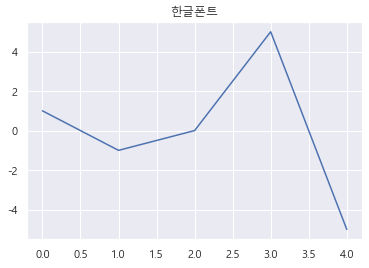

In [14]:
import matplotlib.pyplot as plt 
import seaborn as sns

sns.set(font="Malgun Gothic", 
        rc={"axes.unicode_minus":False},
        style='darkgrid')

# 한글폰트 설정 확인을 합니다.
pd.Series([1, -1, 0, 5, -5]).plot(title="한글폰트")

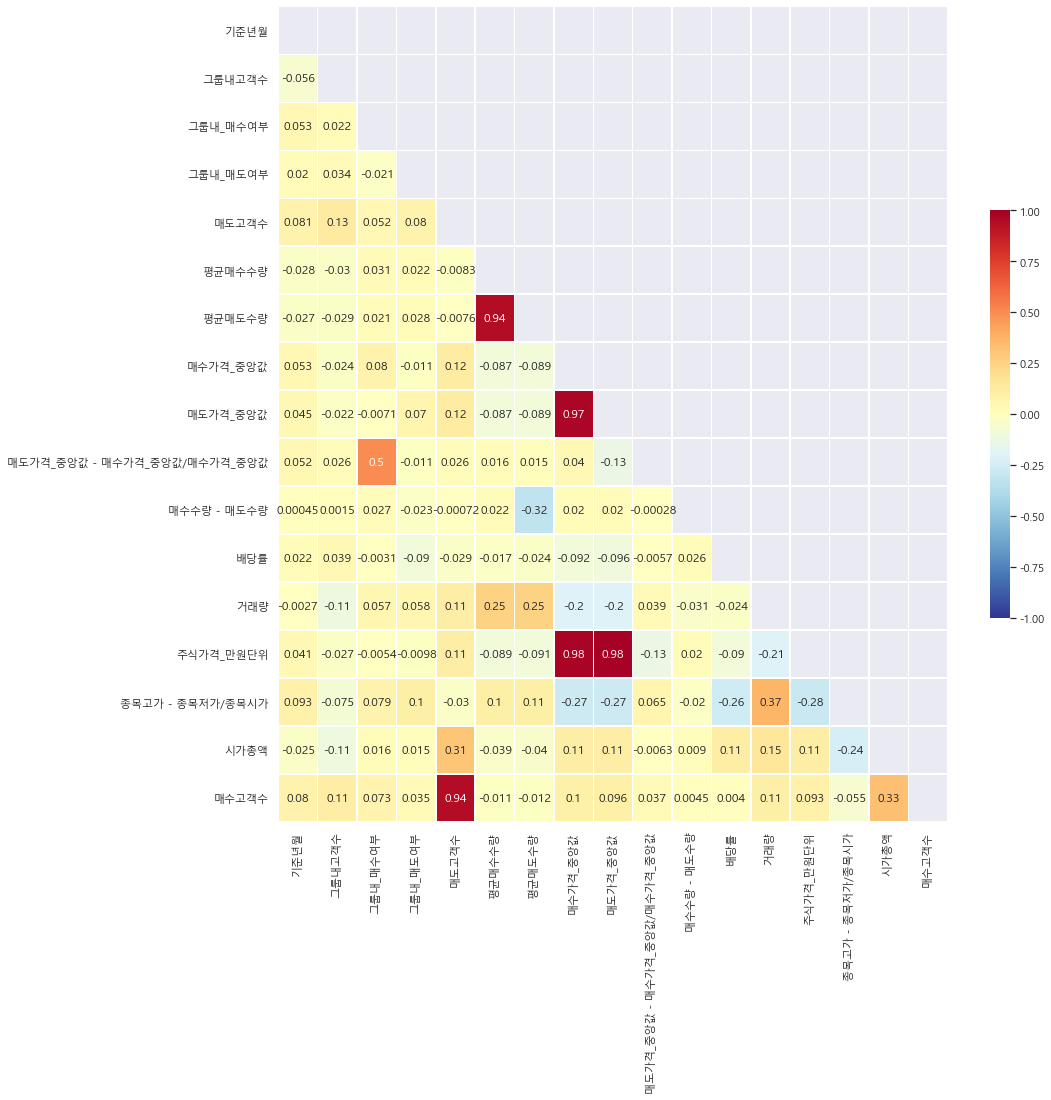

In [15]:
corr = final.corr()
# 그림 사이즈 지정
fig, ax = plt.subplots(figsize=(15, 15))

# 삼각형 마스크를 만든다(위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, 
            cmap = 'RdYlBu_r', 
            annot = True,   # 실제 값을 표시한다
            mask=mask,      # 표시하지 않을 마스크 부분을 지정한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
           )  
plt.show()

In [16]:
final.to_csv("trade_add.csv")

In [18]:
stocks.to_csv("stocks_add.csv")

#### 결측치 확인 & 전처리

In [ ]:
# trade.info() null값 없음
# stocks.info()

In [ ]:
# trade.rename(columns = {'Unnamed: 0' : 'index', '기준년월':'year_month', '그룹번호':'Group_num', '그룹내고객수':'Customer_cnt', 
#                        '종목번호':'Stock_num', '그룹내_매수여부':'Buying_YN', '그룹내_매도여부':'Selling_YN', '매수고객수':'Buyer_cnt',
#                         '매도고객수':'Seller_cnt', '평균매수수량':'Buying_cnt_avg', '평균매도수량':'Selling_cnt_avg', 
#                         '매수가격_중앙값':'BuyingPrice_median', '매도가격_중앙값':'SellingPrice_median'}, inplace = True)
# # trade.head()

In [ ]:
trade = trade.astype({
    'Buying_YN':int,
    'Selling_YN':int
})

In [ ]:
# trade["Group_num"].value_counts()
# trade["Stock_num"].value_counts()

In [ ]:
df=trade.drop("index", axis=1)
# df.head()
# df.shape

#### 시간 변수 추가

In [ ]:
df["datetime"] = pd.to_datetime(df["year_month"], format='%Y%m')
df.head()

In [ ]:
group = df["Group_num"].values
group = pd.unique(group)
group # len(group)=48

- 상관관계 조사

#### 평균 매수/매도 금액 feature 추가

In [ ]:
df2 = trade_merge.copy()
df2["BuyingPrice_avg"] = (df2["Buying_cnt_avg"]*df2["BuyingPrice_median"])//df2["Buyer_cnt"]
df2["SellingPrice_avg"] = (df2["Selling_cnt_avg"]*df2["SellingPrice_median"])//df2["Seller_cnt"]
df2.head()

평균 매수/매도 금액 feature 상관관계 약함

In [ ]:
corr_matrix = trade_merge.corr()
corr_matrix["Buyer_cnt"].sort_values(ascending=False)

In [ ]:
attributes = ["Seller_cnt", "Top3_YN", "Customer_cnt", "BuyingPrice_median", "SellingPrice_median"]
scatter_matrix(trade_merge[attributes], figsize=(12, 8))

In [ ]:
stock_num=stocks["종목번호"].values
stock_num=pd.unique(stock_num)
len(stock_num)

#### Binary Encoding

일반적으로 ONE-HOT ENCODING이 많이 쓰이지만 처리 후 변수의 갯수가 너무 많을 때 모델 성능이 떨어진다.
그래서 변수갯수를 줄이기 위해 BINARY ENCODING을 사용한다

참고 자료: https://techblog-history-younghunjo1.tistory.com/99?category=863123

pip install --upgrade category_encoders

In [32]:
import category_encoders as ce

#Create object for binary encoding
encoder= ce.BinaryEncoder(cols=['표준산업구분코드_소분류'],return_df=True)

In [33]:
#Fit and Transform Data 
data_encoded=encoder.fit_transform(stocks) 
data_encoded

,Unnamed: 0,기준일자,종목번호,종목명,20년7월TOP3대상여부,시장구분,표준산업구분코드_소분류_0,표준산업구분코드_소분류_1,표준산업구분코드_소분류_2,표준산업구분코드_소분류_3,...,표준산업구분코드_소분류_7,거래량,주식가격_만원단위,종목고가 - 종목저가/종목시가,주식발행수,시가총액,year,month,day,기준년월
0,0,20190701,A000020,동화약품,0,1,0,0,0,0,...,1,31341,0.975751,1.652893,27931470.0,2.725415e+07,2019,7,201,201907
1,1,20190701,A000080,하이트진로,0,1,0,0,0,0,...,0,127186,2.032732,1.703163,70133611.0,1.425628e+08,2019,7,201,201907
2,2,20190701,A000100,유한양행,1,1,0,0,0,0,...,1,395757,25.620158,6.756757,66856810.0,1.712882e+09,2019,7,201,201907
3,3,20190701,A000120,CJ대한통운,0,1,0,0,0,0,...,1,62513,13.534785,2.930403,22812344.0,3.087602e+08,2019,7,201,201907
4,4,20190701,A000140,하이트진로홀딩스,1,1,0,0,0,0,...,0,7661,0.900144,3.090508,23206765.0,2.088942e+07,2019,7,201,201907
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286056,286056,20200728,A336370,두산솔루스,0,1,0,0,0,1,...,0,1764085,3.829229,5.802969,30589758.0,1.171352e+08,2020,7,202,202007
286057,286057,20200728,A33637K,두산솔루스1우,0,1,0,0,0,1,...,0,302925,1.867208,7.734807,7366400.0,1.375460e+07,2020,7,202,202007
286058,286058,20200728,A33637L,두산솔루스2우B,0,1,0,0,0,1,...,0,59460,3.770838,5.810811,1646050.0,6.206987e+06,2020,7,202,202007
286059,286059,20200728,A344820,케이씨씨글라스,0,1,0,0,1,0,...,0,56962,3.274973,3.731343,8350210.0,2.734671e+07,2020,7,202,202007


In [ ]:
from matplotlib.pyplot import figure
from datetime import datetime   # 패키지 - 모듈 (이름 같음)
df.info()

In [ ]:
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

x=df['기준년월']
y=df['평균매수수량']
plt.legend(df['종목번호'])
plt.plot(x,y)

In [ ]:
df2=df[df['그룹내_매수여부']=='Y']
df2= df2[["기준년월", "그룹번호", "그룹내고객수", "종목번호", "매수고객수", "매도고객수", "평균매수수량", "평균매도수량", "매수가격_중앙값", "매도가격_중앙값"]]
df2

In [ ]:
df2["평균매수액"]=df2["평균매수수량"]*df2["매수가격_중앙값"]/df2["그룹내고객수"]
df2

In [ ]:
df2["평균매수액"]=np.round(df2["평균매수액"], decimals=0)

In [ ]:
df2[df2["종목번호"]=='A000660']

In [ ]:
df3=stocks[stocks["20년7월TOP3대상여부"]=='Y']
df3.drop_duplicates()

In [ ]:
df3["종목명"].drop_duplicates()

In [35]:
a=[[1,2],[2,1]]
b=[[4,1],[2,2]]

In [36]:
np.dot(a,b)

array([[ 8,  5],
       [10,  4]])

In [37]:
a

[[1, 2], [2, 1]]

In [38]:
def crash_course(dltr):
    result=0
    temp=1
    
    for i in range(1,dltr):
        temp=temp*i
        for k in range(i):
            result += temp
    return result

In [39]:
print( "Result is: ", crash_course(4)) 

Result is:  23


In [40]:
np.cross(a,b)

array([-7,  2])

In [41]:
def y(x):
    global a
    a=4
    return 0

def f(a):
    a=3
    print(a)
    return a

a=5
f(a)
print(a)
y(a)
print(a)


3
5
4


In [42]:
arr = [1.4,3.7,4.8,6.3,99.9]

In [43]:
x = arr.pop(2)

In [44]:
x

4.8

In [47]:
arr=np.array([[1, 2, 3], [4, 5, 6]])

In [48]:
arr.T

array([[1, 4],
       [2, 5],
       [3, 6]])

https://github.com/demetere/Retail-Data-Analytics-Project/blob/ec5b60eb698d4cd4df1f67e67b18165ce1aad058/models/classification/classification.ipynb

#### Goals
: 14일 이내에 재구매할 고객 예측

#### Steps
- Import Libraries
- Collecting Data
- Preparing Data
- Feature Engineering
- Train Model
- Predict
- Conclusion

### Feature 3. 시장구분(코스피, 코스닥)
코스피 시장인지 코스닥시장인지 구분필요
### Feature 4 ~6 표준산업구분 코드_대분류, 중분류, 소분류.

### TR 구하는 공식
아래 세가지의 경우에서 절대값으로 가장 큰 값이 TR이 된다.

1. 금일의 고가 - 금일의 저가
2. 금일의 고가 - 전일의 종가
3. 금일의 저가 - 전일의 종가


In [ ]:
df_tr = stocks1.copy()
df_tr['전일종가'] = df_tr.groupby('stock_num')['종목종가'].shift(1)
df_tr.head()

In [ ]:
# 금일의 고가 - 금일의 저가
df_tr['금일고가_금일저가'] = abs(df_tr['종목고가'] - df_tr['종목저가'])
# 금일의 고가 - 전일의 종가
df_tr['금일고가_전일종가'] = abs(df_tr['종목고가'] - df_tr['전일종가'])
# 금일의 저가 - 전일의 종가
df_tr['금일저가_전일종가'] = abs(df_tr['종목저가'] - df_tr['전일종가'])

df_tr["금일고가_전일종가"] = df_tr["금일고가_전일종가"].fillna(0)
df_tr["금일저가_전일종가"] = df_tr["금일저가_전일종가"].fillna(0)

In [ ]:
arr1 = df_tr["금일고가_금일저가"].values
arr2 = df_tr["금일고가_전일종가"].values
arr3 = df_tr["금일저가_전일종가"].values

array = np.array([arr1, arr2, arr3])
tr_max = array.max(axis=0)
tr = pd.DataFrame({'tr':tr_max}, columns=['tr'])

stocks_df = stocks1.copy()
stocks_df["TR"]=tr
stocks_df.head()

In [ ]:
# df2 = stocks1.copy()
# pd.merge(df2, mean, on='stock_num')

In [ ]:
stocks_df.astype({
    "기준일자": 'object',
    "TR": 'int'
})

stocks_df["datetime"] = pd.to_datetime(df_tr["기준일자"], format='%Y%m%d')
stocks_df.head()

In [ ]:
beta_group1 = stocks_df[stocks_df["beta_group"]==1]
beta_group2 = stocks_df[stocks_df["beta_group"]==2]
beta_group3 = stocks_df[stocks_df["beta_group"]==3]

In [ ]:
beta_group1.groupby(['datetime', 'stock_num'])['TR'].sum().unstack().dropna(axis=1).plot(figsize=(10,5),legend=None)
plt.title("beta_group1's TR trend")
plt.grid(color = 'lightgrey', alpha=0.5, linestyle='--') 

beta_group2.groupby(['datetime', 'stock_num'])['TR'].sum().unstack().dropna(axis=1).plot(figsize=(10,5),legend=None)
plt.title("beta_group2's TR trend")
plt.grid(color = 'lightgrey', alpha=0.5, linestyle='--') 

beta_group3.groupby(['datetime', 'stock_num'])['TR'].sum().unstack().dropna(axis=1).plot(figsize=(10,5),legend=None)
plt.title("beta_group3's TR trend")
plt.grid(color = 'lightgrey', alpha=0.5, linestyle='--') 

In [ ]:
df_2020 = stocks_df[stocks_df["datetime"].dt.year==2020]
beta_group1 = df_2020[df_2020["beta_group"]==1]
beta_group2 = df_2020[df_2020["beta_group"]==2]
beta_group3 = df_2020[df_2020["beta_group"]==3]

beta_group1.groupby(['datetime', 'stock_num'])['TR'].sum().unstack().dropna(axis=1).plot(figsize=(10,5),legend=None)
plt.title("beta_group1's TR 2020 trend")
plt.grid(color = 'lightgrey', alpha=0.5, linestyle='--') 

beta_group2.groupby(['datetime', 'stock_num'])['TR'].sum().unstack().dropna(axis=1).plot(figsize=(10,5),legend=None)
plt.title("beta_group2's TR 2020 trend")
plt.grid(color = 'lightgrey', alpha=0.5, linestyle='--') 

beta_group3.groupby(['datetime', 'stock_num'])['TR'].sum().unstack().dropna(axis=1).plot(figsize=(10,5),legend=None)
plt.title("beta_group3's TR 2020 trend")
plt.grid(color = 'lightgrey', alpha=0.5, linestyle='--') 

In [ ]:
stocks_df.columns

In [ ]:
stocks_cl = stocks_df[["datetime", "stock_num", "종목명", "시장구분",'거래량', '거래금액_만원단위', 
                       'beta_value', 'beta_group', 'TR', '20년7월TOP3대상여부' ]]
stocks_cl.head()

In [23]:
stocks.loc[stocks['시장구분']=='코스피','시장구분']=1
stocks.loc[stocks['시장구분']=='코스닥','시장구분']=0

stocks.loc[stocks['20년7월TOP3대상여부']=='Y','20년7월TOP3대상여부']=1
stocks.loc[stocks['20년7월TOP3대상여부']=='N','20년7월TOP3대상여부']=0

In [24]:
stocks.head()

,Unnamed: 0,기준일자,종목번호,종목명,20년7월TOP3대상여부,시장구분,표준산업구분코드_소분류,거래량,주식가격_만원단위,종목고가 - 종목저가/종목시가,주식발행수,시가총액,year,month,day,기준년월
0,0,20190701,A000020,동화약품,0,1,의약품 제조업,31341,0.975751,1.652893,27931470.0,2.725415e+07,2019,7,201,201907
1,1,20190701,A000080,하이트진로,0,1,알코올음료 제조업,127186,2.032732,1.703163,70133611.0,1.425628e+08,2019,7,201,201907
2,2,20190701,A000100,유한양행,1,1,의약품 제조업,395757,25.620158,6.756757,66856810.0,1.712882e+09,2019,7,201,201907
3,3,20190701,A000120,CJ대한통운,0,1,도로 화물 운송업,62513,13.534785,2.930403,22812344.0,3.087602e+08,2019,7,201,201907
4,4,20190701,A000140,하이트진로홀딩스,1,1,기타 금융업,7661,0.900144,3.090508,23206765.0,2.088942e+07,2019,7,201,201907


In [25]:
stocks=stocks.drop("Unnamed: 0", axis=1)

In [28]:
stocks.to_csv("stocks_add.csv")

In [ ]:
stocks_cl = stocks_cl.drop('상장구분', axis=1)
stocks_cl.head()

In [ ]:
data_stocks = pd.read_csv("stocks.csv")
stock_feature = data_stocks[['종목번호','종목명','20년7월TOP3대상여부','시장구분','표준산업구분코드_대분류','표준산업구분코드_중분류','표준산업구분코드_소분류']]
stock_feature = stock_feature.sort_values(by='종목번호') #종목기준으로 정렬
stock_feature = stock_feature.drop_duplicates(['종목번호']) #종목 dupicated
stock_feature.head()

In [ ]:
# trade.rename(columns = {'Unnamed: 0' : 'index', '기준년월':'year_month', '그룹번호':'Group_num', '그룹내고객수':'Customer_cnt', 
#                        '종목번호':'Stock_num', '그룹내_매수여부':'Buying_YN', '그룹내_매도여부':'Selling_YN', '매수고객수':'Buyer_cnt',
#                         '매도고객수':'Seller_cnt', '평균매수수량':'Buying_cnt_avg', '평균매도수량':'Selling_cnt_avg', 
#                         '매수가격_중앙값':'BuyingPrice_median', '매도가격_중앙값':'SellingPrice_median'}, inplace = True)
# # trade.head()

In [ ]:
stock_feature

In [ ]:
train.columns

In [ ]:
X = train[['Customer_cnt', 'Buying_YN',
       'Selling_YN', 'Seller_cnt', 'Buying_cnt_avg',
       'Selling_cnt_avg', 'BuyingPrice_median', 'SellingPrice_median',
       ]].values

In [ ]:
len(X)

#### test set 분류 (2020-06)

In [ ]:
test = df[df["datetime"].dt.month == 6]
train = df[df["datetime"].dt.month != 6]

### 훈련

In [ ]:
def eval_on_features(features, target, regressor):
    X_train, X_test = features[:n_train], features[n_train:]
    
    y_train, y_test = target[:n_train], target[n_train:]
    regressor.fit(X_train, y_train)
    
    print("테스트 세트 R^2:{:.2f}".format(regressor.score(X_test, y_test)))
    
    y_pred = regressor.predict(X_test)
    y_pred_train = regressor.predict(X_train)
    
#     print(y_pred, y_pred_train)
#     plt.figure(figsize=(10, 3))
    
#     plt.xticks(range(0, len(X), 8), xticks_name, rotation=90, ha="left")
    
#     plt.plot(range(n_train), y_train, label="훈련")
#     plt.plot(range(n_train, len(y_test) + n_train), y_test, '-', label="테스트")
#     plt.plot(range(n_train), y_pred_train, '--', label="훈련 예측")
    
#     plt.plot(range(n_train, len(y_test) + n_train), y_pred, '--', label="테스트 예측")
#     plt.legend(loc=(1.01, 0))
#     plt.xlabel("날짜")
#     plt.ylabel("매수")

In [ ]:
train = train[['datetime', 'Group_num','Customer_cnt', 'Buying_YN',
       'Selling_YN', 'Buyer_cnt', 'Seller_cnt', 'Buying_cnt_avg',
       'Selling_cnt_avg', 'BuyingPrice_median', 'SellingPrice_median']]

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100, random_state=0)

for group_num in group:
    train = train.copy()
    t = train[train["Group_num"]==group_num]
    n_train = t[t["datetime"].dt.month != 5].shape[0]
    t = t.set_index("datetime")
    y = t["Buyer_cnt"].values
    t = t.drop(["Buyer_cnt", "Group_num"], axis=1)
    X = t.values
    print(X.shape, y.shape)
    eval_on_features(X, y, regressor)
#     break

나 갑자기 생각난건데 trade data에서 월별 그룹당 (총 매수고객수 대비 각 종목별 매수고객수)가 그 달의 매수고객수를 종목별 비율로 알 수 있어서 좋을 것 같은데 어떻게 생각해

In [ ]:
group = trade['그룹번호'].unique()
len(group)

In [ ]:
group[:16] # 유진

In [ ]:
group[16:32] # 현욱

In [ ]:
group[32:] # 소민

### Create Answer Sheet

In [ ]:
submission = pd.read_csv("answer_sheet.csv")

In [ ]:
submission.iloc[:,1:] = pred.reshape(-1, 3)

In [ ]:
submission.to_csv("[20200919]answer", index=False)